In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [3]:
# Filepath to the output data stored in a numpy array
filePath = 'TIM_SW_ReverseModel_BeamProp.zmx_BandpassData.npy'

# data is stored in a dictionary with the keys: 'X_Feeds', 'Y_Feeds', 'Wavs', and 'bandpass'.
# Each entry is a numpy array whose rows/columns are spatial/spectral feeds and whose third dimension 
# is the percent of rays through for the given wavelength in the corresponding position in the
# array 'Wavs'. The coordinates of the feeds evaluated are given by 'X_Feeds' and 'Y_Feeds' as 2D arrays.
data = np.load(filePath, allow_pickle=True).item()
X_feeds = data['X_Feeds']
Y_feeds = data['Y_Feeds']
wavs = data['Wavs']
bandpass = data['bandpass']

In [4]:
bandpass.shape

(7, 5, 1000)

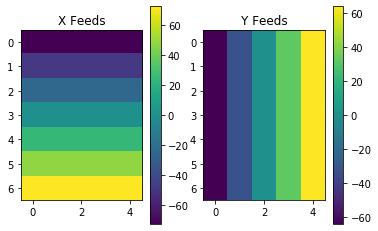

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
x_feeds = ax1.imshow(X_feeds)
ax1.set_title('X Feeds')
fig.colorbar(x_feeds, ax=ax1)
y_feeds = ax2.imshow(Y_feeds)
ax2.set_title('Y Feeds')
fig.colorbar(y_feeds, ax=ax2);

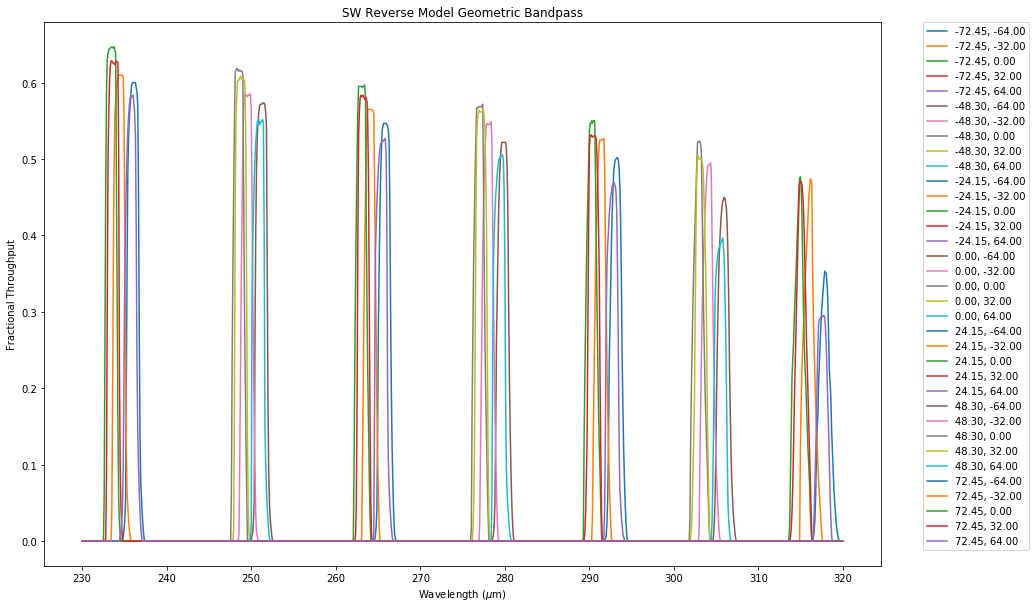

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
for i in range(len(X_feeds)):
    for j in range(len(X_feeds[0])):
        ax.plot(wavs, bandpass[i][j], **{'label': '{:.2f}, {:.2f}'.format(X_feeds[i][j], Y_feeds[i][j])});
ax.set_xticks(np.arange(wavs[0], wavs[-1]+10, step=10))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
ax.set_title('SW Reverse Model Geometric Bandpass')
ax.set_ylabel('Fractional Throughput')
ax.set_xlabel('Wavelength ($\mu$m)');

We use the maximum fractional throughput within each feed horn bandpass to determine the wavelength of the beam to launch from the feed position in the time-reversed model. Experimentation has shown that even with the low fractional throughput at the upper end of the band, the maximum is still well correlated. 

In [7]:
wavs[np.argmax(bandpass, 2)]

array([[317.83783784, 316.12612613, 314.95495495, 314.86486486,
        317.65765766],
       [305.94594595, 304.32432432, 302.97297297, 302.79279279,
        305.76576577],
       [293.24324324, 291.71171171, 290.27027027, 290.18018018,
        292.88288288],
       [279.63963964, 278.28828829, 277.38738739, 276.93693694,
        279.63963964],
       [265.67567568, 263.78378378, 263.42342342, 262.97297297,
        265.85585586],
       [251.35135135, 249.27927928, 248.28828829, 248.73873874,
        250.9009009 ],
       [235.94594595, 234.32432432, 233.42342342, 233.42342342,
        236.03603604]])

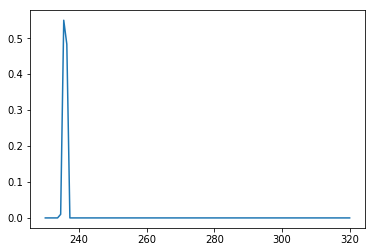

In [10]:
plt.plot(wavs, bandpass[6][4]);

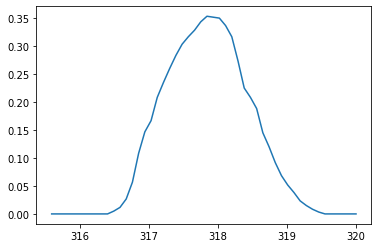

In [12]:
plt.plot(wavs[950:1000], bandpass[0][0][950:1000]);

In [16]:
wavs[np.argmax(bandpass[0][0])]

317.8378378378378

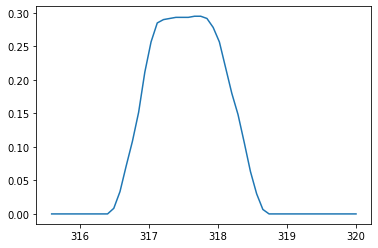

In [13]:
plt.plot(wavs[950:1000], bandpass[0][4][950:1000]);

In [14]:
wavs[np.argmax(bandpass[0][4])]

317.65765765765764